In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/T1.nii.gz')
image_data_2 = nib.load('../images/T1_V2.nii.gz')

In [28]:
def histogram_matching(imgOrigin, imgTarget):
    # Obtener los datos de las imágenes de origen y objetivo
    data_orig = imgOrigin.get_fdata()
    data_target = imgTarget.get_fdata()

    # Redimensionar los datos en un solo arreglo 1D
    flat_orig = data_orig.flatten()
    flat_target = data_target.flatten()

    # Calcular los cuartiles de las imágenes de origen y objetivo
    orig_quartiles = np.percentile(flat_orig, [25, 50, 75])
    target_quartiles = np.percentile(flat_target, [25, 50, 75])

    # Crear el histograma de la imagen de origen
    plt.figure(figsize=(8, 4))
    plt.hist(flat_orig.flatten(), bins=256, range=(0, 255), alpha=0.5, color='blue', label='Imagen de Origen')

    # Agregar líneas verticales para indicar los cuartiles en el histograma
    for quartile in orig_quartiles:
        plt.axvline(x=quartile, color='red', linestyle='--', linewidth=1.5)

    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de la Imagen de Origen')
    plt.legend()

    plt.show()

    # Mapear los valores de la imagen de origen a los valores de la imagen objetivo basado en los cuartiles
    lut = np.interp(flat_orig, orig_quartiles, target_quartiles)

    # Aplicar el mapeo a los datos de la imagen de origen
    data_matched = lut.reshape(data_orig.shape)

    # Crear una nueva imagen con los datos transformados
    image_matched = nib.Nifti1Image(data_matched, imgOrigin.affine, imgOrigin.header)

    return image_matched

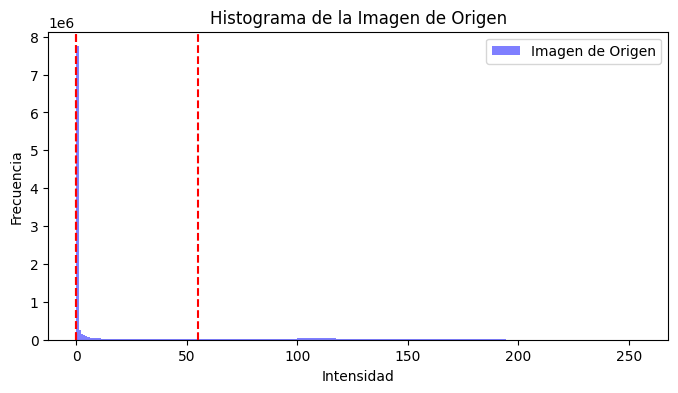

In [29]:
res1 = histogram_matching(image_data, image_data_2)

In [20]:

def histogram_matching(imgOrigin,imgTarget):
    #histogram
    data_orig = imgOrigin.get_fdata()
    data_target = imgTarget.get_fdata()

    # Redimensionar los datos en un solo arreglo 1D
    flat_orig = data_orig.flatten()
    flat_target = data_target.flatten()

    # Calcular los histogramas acumulativos
    hist_orig, bins = np.histogram(flat_orig, bins=256, range=(0, 255), density=True)
    hist_orig_cumulative = hist_orig.cumsum()
    hist_target, _ = np.histogram(flat_target, bins=256, range=(0, 255), density=True)
    hist_target_cumulative = hist_target.cumsum()

    # Mapear los valores de la imagen de origen a los valores de la imagen objetivo
    lut = np.interp(hist_orig_cumulative, hist_target_cumulative, bins[:-1])

    # Aplicar el mapeo a los datos de la imagen de origen
    data_matched = np.interp(data_orig, bins[:-1], lut)

    # Crear una nueva imagen con los datos estandarizados
    # image_matched = nib.Nifti1Image(data_matched, imgOrigin.affine,imgOrigin.header)
    # data = image_matched.get_fdata()
    return data_matched

In [21]:
res = histogram_matching(image_data, image_data_2)

(array([109339.,  76952., 113289.,  47179.,  71220.,  68613.,  64279.,
         60078.,  57990.,  55687.,  54431.,  54131.,  52908.,  52625.,
         52440.,  52439.,  52789.,  54098.,  54746.,  55195.,  56139.,
         57375.,  59122.,  60104.,  62103.,  63257.,  65148.,  67259.,
         69235.,  72030.,  73973.,  76306.,  78060.,  79220.,  79988.,
         81060.,  81460.,  80668.,  79659.,  78991.,  77342.,  75271.,
         72788.,  71649.,  69107.,  66870.,  65534.,  63979.,  62413.,
         61621.,  60396.,  59674.,  60201.,  60031.,  60005.,  60945.,
         61276.,  62061.,  61393.,  59955.,  57041.,  53510.,  49362.,
         45898.,  42426.,  39758.,  36411.,  33521.,  30656.,  27795.,
         25068.,  22408.,  20138.,  17765.,  15550.,  13768.,  12138.,
         10984.,   9897.,   9045.,   8195.,   7282.,   6894.,   6101.,
          5464.,   4890.,   4702.,   4101.,   3802.,   3508.,   3208.,
          2877.,   2612.,   2522.,   2290.,   2038.,   1892.,   1671.,
      

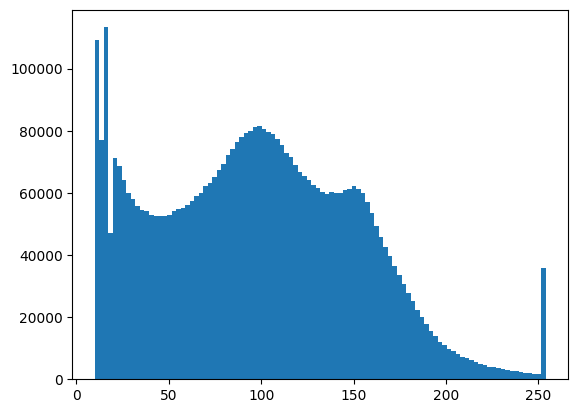

In [24]:
plt.hist(res[res>10].flatten(),100)